In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

In [3]:
train=pd.read_csv(r"D:\DOCUMENTS\JUPYTER NOTEBOOK\WALMART SALES DATA\train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,24924.50,False
1,1,1,12-02-2010,46039.49,True
2,1,1,19-02-2010,41595.55,False
3,1,1,26-02-2010,19403.54,False
4,1,1,05-03-2010,21827.90,False


In [4]:
test=pd.read_csv(r"D:\DOCUMENTS\JUPYTER NOTEBOOK\WALMART SALES DATA\test.csv\test.csv")
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
features=pd.read_csv(r"D:\DOCUMENTS\JUPYTER NOTEBOOK\WALMART SALES DATA\features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
store=pd.read_csv(r"D:\DOCUMENTS\JUPYTER NOTEBOOK\WALMART SALES DATA\stores.csv")
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,01-04-2011,1495064.75
1,1,01-06-2012,1624477.58
2,1,01-07-2011,1488538.09
3,1,01-10-2010,1453329.50
4,1,02-03-2012,1688420.76
5,1,02-04-2010,1594968.28
6,1,02-07-2010,1492418.14
7,1,02-09-2011,1550229.22
8,1,02-12-2011,1584083.95
9,1,03-02-2012,1636339.65


In [8]:
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,01-04-2011,1495064.75,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
1,1,01-06-2012,1624477.58,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,False
2,1,01-07-2011,1488538.09,85.55,3.524,NaN,NaN,NaN,NaN,NaN,215.184137,7.962,False
3,1,01-10-2010,1453329.50,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,False
4,1,02-03-2012,1688420.76,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,False
5,1,02-04-2010,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
6,1,02-07-2010,1492418.14,80.91,2.669,NaN,NaN,NaN,NaN,NaN,211.223533,7.787,False
7,1,02-09-2011,1550229.22,87.83,3.533,NaN,NaN,NaN,NaN,NaN,215.797141,7.962,False
8,1,02-12-2011,1584083.95,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
9,1,03-02-2012,1636339.65,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False


In [9]:
data=pd.merge(data,store,on=['Store'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,01-04-2011,1495064.75,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
1,1,01-06-2012,1624477.58,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,False,A,151315
2,1,01-07-2011,1488538.09,85.55,3.524,NaN,NaN,NaN,NaN,NaN,215.184137,7.962,False,A,151315
3,1,01-10-2010,1453329.50,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,False,A,151315
4,1,02-03-2012,1688420.76,60.96,3.630,15441.40,1569.00,10.80,25390.88,8067.61,220.848045,7.348,False,A,151315
5,1,02-04-2010,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
6,1,02-07-2010,1492418.14,80.91,2.669,NaN,NaN,NaN,NaN,NaN,211.223533,7.787,False,A,151315
7,1,02-09-2011,1550229.22,87.83,3.533,NaN,NaN,NaN,NaN,NaN,215.797141,7.962,False,A,151315
8,1,02-12-2011,1584083.95,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False,A,151315
9,1,03-02-2012,1636339.65,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,220.172015,7.348,False,A,151315


In [10]:
data=data.sort_values(by='Date')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,01-04-2011,1495064.75,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
1287,10,01-04-2011,1827733.18,67.64,3.772,NaN,NaN,NaN,NaN,NaN,128.719935,8.494,False,B,126512
5148,37,01-04-2011,534578.78,67.31,3.524,NaN,NaN,NaN,NaN,NaN,213.577670,8.300,False,C,39910
2288,17,01-04-2011,795859.23,39.38,3.487,NaN,NaN,NaN,NaN,NaN,128.719935,6.774,False,B,93188
4147,30,01-04-2011,437926.79,56.36,3.524,NaN,NaN,NaN,NaN,NaN,214.488691,7.931,False,C,42988
3432,25,01-04-2011,618377.79,28.50,3.638,NaN,NaN,NaN,NaN,NaN,207.882304,7.287,False,B,128107
3003,22,01-04-2011,951588.37,36.04,3.638,NaN,NaN,NaN,NaN,NaN,137.955893,8.252,False,B,119557
3146,23,01-04-2011,1182694.95,29.44,3.638,NaN,NaN,NaN,NaN,NaN,134.068258,4.781,False,B,114533
3289,24,01-04-2011,1163803.30,35.73,3.811,NaN,NaN,NaN,NaN,NaN,134.068258,8.212,False,A,203819
2574,19,01-04-2011,1305950.22,30.68,3.811,NaN,NaN,NaN,NaN,NaN,134.068258,7.658,False,A,203819


<AxesSubplot:xlabel='Type', ylabel='count'>

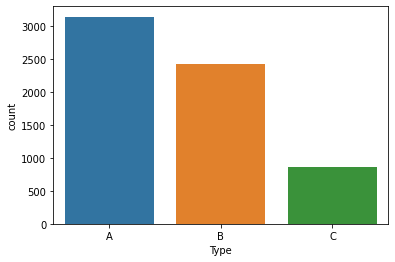

In [11]:
sns.countplot(x="Type", data=data)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

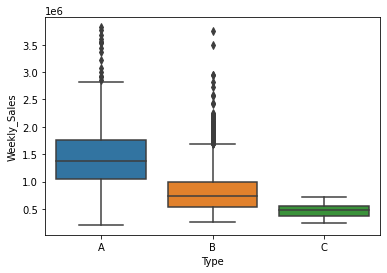

In [12]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)

<AxesSubplot:ylabel='Frequency'>

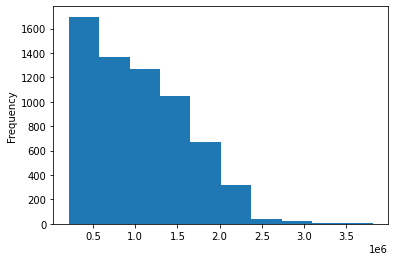

In [13]:
data["Weekly_Sales"].plot.hist()

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

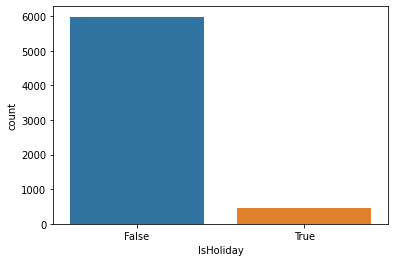

In [14]:
sns.countplot(x="IsHoliday", data=data)

In [15]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

<AxesSubplot:>

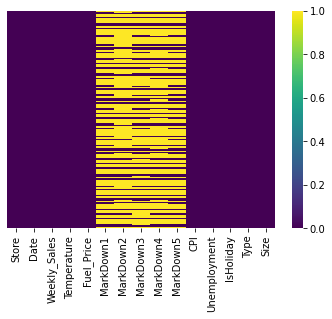

In [16]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [17]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,01-04-2011,1495064.75,59.17,3.524,214.837166,7.682,False,A,151315
1287,10,01-04-2011,1827733.18,67.64,3.772,128.719935,8.494,False,B,126512
5148,37,01-04-2011,534578.78,67.31,3.524,213.577670,8.300,False,C,39910
2288,17,01-04-2011,795859.23,39.38,3.487,128.719935,6.774,False,B,93188
4147,30,01-04-2011,437926.79,56.36,3.524,214.488691,7.931,False,C,42988
3432,25,01-04-2011,618377.79,28.50,3.638,207.882304,7.287,False,B,128107
3003,22,01-04-2011,951588.37,36.04,3.638,137.955893,8.252,False,B,119557
3146,23,01-04-2011,1182694.95,29.44,3.638,134.068258,4.781,False,B,114533
3289,24,01-04-2011,1163803.30,35.73,3.811,134.068258,8.212,False,A,203819
2574,19,01-04-2011,1305950.22,30.68,3.811,134.068258,7.658,False,A,203819


In [18]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

<AxesSubplot:>

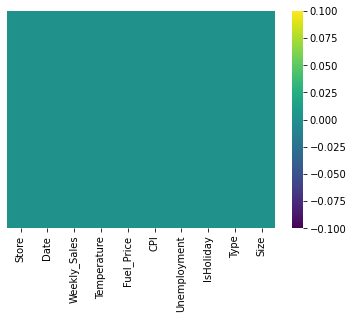

In [19]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [20]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,01-04-2011,1495064.75,59.17,3.524,214.837166,7.682,False,A,151315,0
1287,10,01-04-2011,1827733.18,67.64,3.772,128.719935,8.494,False,B,126512,0
5148,37,01-04-2011,534578.78,67.31,3.524,213.577670,8.300,False,C,39910,0
2288,17,01-04-2011,795859.23,39.38,3.487,128.719935,6.774,False,B,93188,0
4147,30,01-04-2011,437926.79,56.36,3.524,214.488691,7.931,False,C,42988,0
3432,25,01-04-2011,618377.79,28.50,3.638,207.882304,7.287,False,B,128107,0
3003,22,01-04-2011,951588.37,36.04,3.638,137.955893,8.252,False,B,119557,0
3146,23,01-04-2011,1182694.95,29.44,3.638,134.068258,4.781,False,B,114533,0
3289,24,01-04-2011,1163803.30,35.73,3.811,134.068258,8.212,False,A,203819,0
2574,19,01-04-2011,1305950.22,30.68,3.811,134.068258,7.658,False,A,203819,0


In [21]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
Type_dummy.head(10)

,B,C
0,0,0
1287,1,0
5148,0,1
2288,1,0
4147,0,1
3432,1,0
3003,1,0
3146,1,0
3289,0,0
2574,0,0


In [22]:
data=pd.concat([data,Type_dummy],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,01-04-2011,1495064.75,59.17,3.524,214.837166,7.682,False,A,151315,0,0,0
1287,10,01-04-2011,1827733.18,67.64,3.772,128.719935,8.494,False,B,126512,0,1,0
5148,37,01-04-2011,534578.78,67.31,3.524,213.577670,8.300,False,C,39910,0,0,1
2288,17,01-04-2011,795859.23,39.38,3.487,128.719935,6.774,False,B,93188,0,1,0
4147,30,01-04-2011,437926.79,56.36,3.524,214.488691,7.931,False,C,42988,0,0,1
3432,25,01-04-2011,618377.79,28.50,3.638,207.882304,7.287,False,B,128107,0,1,0
3003,22,01-04-2011,951588.37,36.04,3.638,137.955893,8.252,False,B,119557,0,1,0
3146,23,01-04-2011,1182694.95,29.44,3.638,134.068258,4.781,False,B,114533,0,1,0
3289,24,01-04-2011,1163803.30,35.73,3.811,134.068258,8.212,False,A,203819,0,0,0
2574,19,01-04-2011,1305950.22,30.68,3.811,134.068258,7.658,False,A,203819,0,0,0


In [23]:
data=data.drop(['Type','IsHoliday'],axis=1)
data.drop(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,01-04-2011,1495064.75,59.17,3.524,214.837166,7.682,151315,0,0,0
1287,10,01-04-2011,1827733.18,67.64,3.772,128.719935,8.494,126512,0,1,0
5148,37,01-04-2011,534578.78,67.31,3.524,213.577670,8.300,39910,0,0,1
2288,17,01-04-2011,795859.23,39.38,3.487,128.719935,6.774,93188,0,1,0
4147,30,01-04-2011,437926.79,56.36,3.524,214.488691,7.931,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,31-12-2010,623092.54,25.89,3.179,204.643227,7.484,128107,1,1,0
714,5,31-12-2010,298180.18,49.79,2.943,211.956714,6.768,34875,1,1,0
5719,40,31-12-2010,811318.30,19.29,3.177,132.815032,5.287,155083,1,0,0
2573,18,31-12-2010,887907.01,26.10,3.177,132.815032,9.331,120653,1,1,0


In [24]:
X=data.drop(['Weekly_Sales','Store','Date'],axis=1)
y=data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [25]:
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

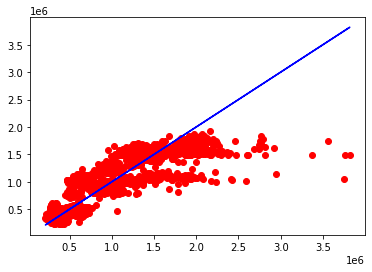

In [26]:
y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [27]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

331518.204155905


In [28]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.65866306800682


In [29]:
prediction=LR.predict(pd.DataFrame([(40.37,2.876,173.325456,7.934,103464,0,0,0)]))
print(prediction)

[769608.87381933]
